In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import pathlib
import sys

home = pathlib.Path().resolve().parent
# path = str(pathlib.Path(home, r'Mukhin\new_workspace'))
sys.path.insert(0, home)

from src.mixture_fit import gen_data, fits, sum_exp_curv, fit, sum_exp, loss_function, right_order, fits_ls
from src.data_loading import load_data
from src.optimal_number import optimal_params
from src.log_data_analysis import log_estimate, bounds
from src.errors import bootstrap_resudial, bootstrap_residual
from src.bootstrapping import bootstrap

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


%matplotlib widget

In [8]:
x, y = np.loadtxt(r'D:\Programms\Jupyter\NPM\NMR\Mukhin\new_workspace\data\DOSY-R2-1-4-DMSO-5points-1000raz-integrals.txt', skiprows=1, usecols=(0, 1)).T
y = y / y[0]
x = x / 1e6

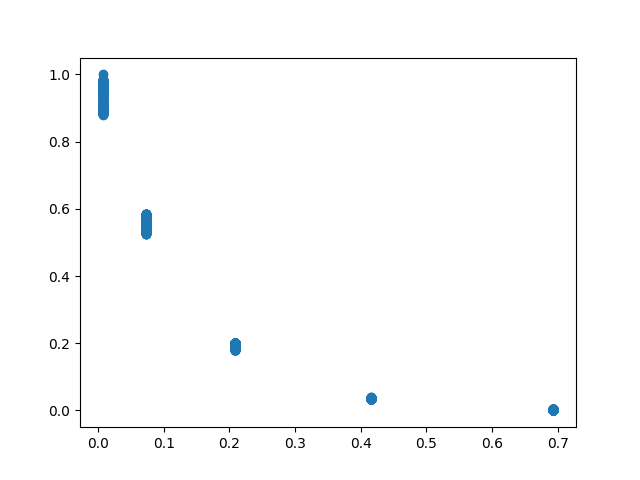

In [9]:
plt.close('all')
plt.scatter(x, y)
plt.show()

In [10]:
std_x, std_y, mean_y = [], [], []
for idx, uniq_x in enumerate(np.unique(x)):
    sub_y = y[x == uniq_x]
    print(uniq_x, sub_y.std())
    std_x.append(uniq_x)
    std_y.append(sub_y.std())
    mean_y.append(sub_y.mean())

0.00663 0.021943967051039237
0.072541 0.012537630252473514
0.2091 0.004847970083075037
0.41615 0.001083328038722294
0.693646 0.0007866602704136937


In [11]:
from scipy.stats import linregress

In [12]:
linregress(std_x, np.log(std_y))

LinregressResult(slope=-5.013727913474094, intercept=-4.09867659202139, rvalue=-0.9562784666777181, pvalue=0.010902047298050338, stderr=0.8852761973775639, intercept_stderr=0.3320327625193674)

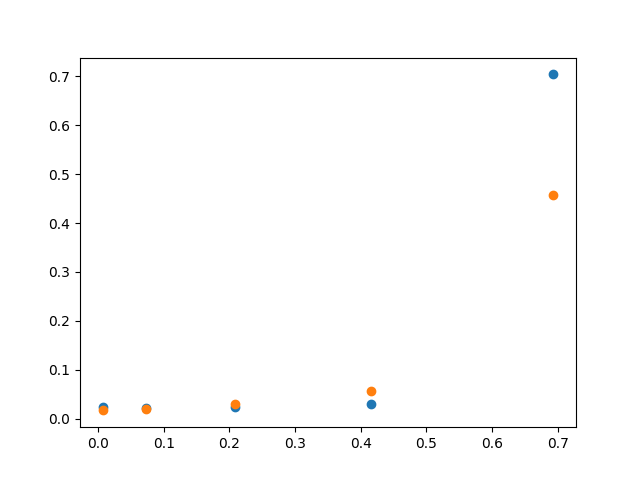

In [14]:
plt.close('all')
plt.scatter(std_x, np.array(std_y)/np.array(mean_y))
plt.scatter(std_x, np.exp(-np.array(std_x) * 5.014 - 4.099)/np.array(mean_y))
plt.show()

In [41]:
fits_ls(np.array(std_x), np.lognp.array(std_y), n_max=1)

[array([1.e-10, 1.e-10])]

ValueError: num must be 1 <= num <= 5, not 6

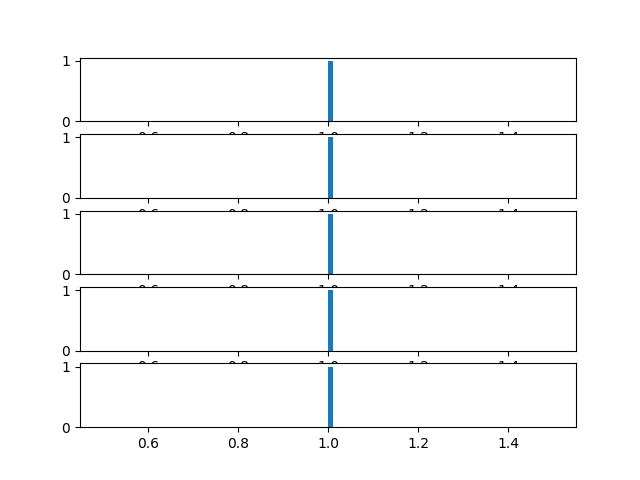

In [34]:
plt.close('all')
for idx, uniq_x in enumerate(np.unique(x)):
    sub_y = y[x == uniq_x]
    plt.subplot(5, 1, idx + 1)
    plt.hist(sub_y/sub_y.mean(), bins=100, histtype='stepfilled')
plt.show()

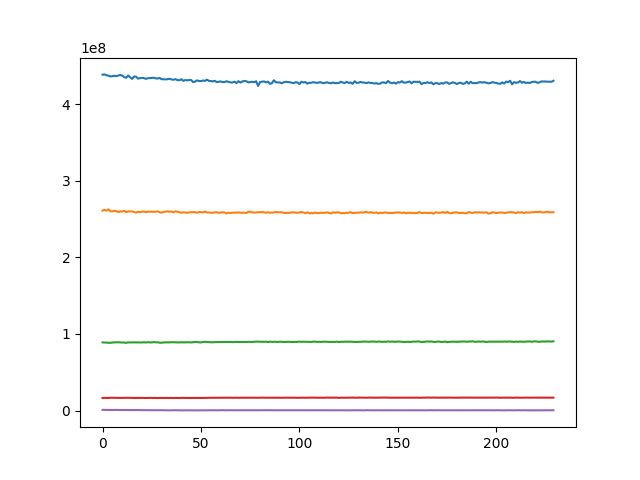

In [46]:
plt.close('all')
for idx, uniq_x in enumerate(np.unique(x)):
    sub_y = y[x == uniq_x][370:600]
    # plt.subplot(5, 1, idx + 1)
    plt.plot(sub_y)
plt.show()